In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv('/content/drive/MyDrive/LoanExport.csv')

<ipython-input-166-4e3f404f7ccb>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/LoanExport.csv')


In [167]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [168]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

MSA : An MSA is a contract that defines the terms and conditions that will regulate current and future transactions between a service provider and its client.
MIP: It is a kind of monthly income plan that bank provide to the investors as a regular income who are risk averse.
OCLTV:CLTV ratio is the ratio of all loans on a property to the property's value. Lenders consider CLTV ratios in determining the risk of a borrower defaulting. In general, most lenders are willing to lend to borrowers with strong credit scores and CLTV ratios of 80% and below.
DTI:

In [169]:
df['EverDelinquent'].unique()

array([0, 1])

In [170]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [171]:
print(df.columns)


columns_to_drop = ['FirstPaymentDate', 'MaturityDate', 'MSA', 'PostalCode', 'LoanSeqNum', 'OrigLoanTerm', 'SellerName','ServicerName','PropertyType','PPM','ProductType','Channel','PropertyState']
existing_columns = [col for col in columns_to_drop if col in df.columns]


df.drop(existing_columns, axis=1, inplace=True)

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')


In [172]:
df['MIP'].unique()

array([25,  0, 30, 12, 35, 29, 17, 18, 20, 22,  6, 14, 33, 16, 52, 36, 28,
       11, 45, 15, 27, 10, 32,  9, 50, 47,  7, 24, 37, 26,  1, 13, 21, 19,
       23, 55,  4])

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstTimeHomebuyer  291451 non-null  object 
 2   MIP                 291451 non-null  int64  
 3   Units               291451 non-null  int64  
 4   Occupancy           291451 non-null  object 
 5   OCLTV               291451 non-null  int64  
 6   DTI                 291451 non-null  int64  
 7   OrigUPB             291451 non-null  int64  
 8   LTV                 291451 non-null  int64  
 9   OrigInterestRate    291451 non-null  float64
 10  LoanPurpose         291451 non-null  object 
 11  NumBorrowers        291451 non-null  object 
 12  EverDelinquent      291451 non-null  int64  
 13  MonthsDelinquent    291451 non-null  int64  
 14  MonthsInRepayment   291451 non-null  int64  
dtypes: float64(1), int64(10), object(4

In [174]:
df.describe()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,0.197848,1.837729,60.805291
std,68.408791,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,0.398378,8.809392,46.142599
min,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,0.000000,0.000000,1.000000
25%,675.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,0.000000,0.000000,34.000000
50%,717.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,0.000000,0.000000,48.000000
75%,753.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,0.000000,0.000000,63.000000
max,849.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,1.000000,180.000000,212.000000


In [175]:
df.isnull().sum()

,0
CreditScore,0
FirstTimeHomebuyer,0
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0
OrigUPB,0
LTV,0
OrigInterestRate,0


DATA VISUALISATION

Loan Status Distribution 1 and 0

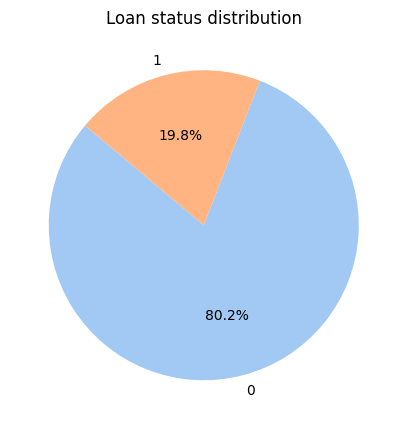

In [176]:
target_count = df['EverDelinquent'].value_counts()
colors = sns.color_palette('pastel')
plt.figure(figsize=(5,6))
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Loan status distribution')
plt.show()

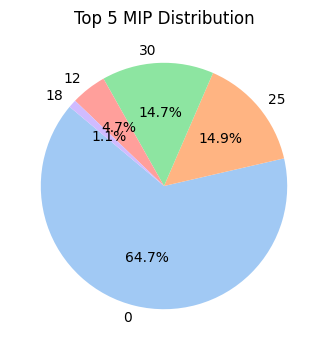

In [177]:
mip_counts = df['MIP'].value_counts().nlargest(5)
colors = sns.color_palette('pastel')[0:len(mip_counts)]
plt.figure(figsize=(6,4))
plt.pie(mip_counts, labels=mip_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 MIP Distribution')
plt.show()

 MIP: A higher value of MIP(like 30 and 25)generally indicates a higher perceived risk by the lender. If an individual has an MIP value of below 12, it usually means that the lender considers their loan to be at lower risk.

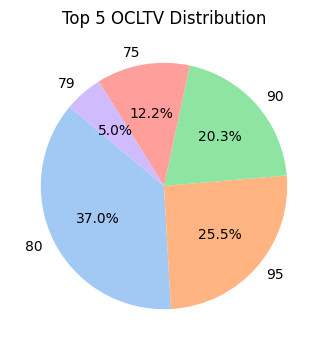

In [178]:
OCLTV_counts = df['OCLTV'].value_counts().nlargest(5)
colors = sns.color_palette('pastel')[0:len(OCLTV_counts)]
plt.figure(figsize=(6,4))
plt.pie(OCLTV_counts, labels=OCLTV_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 OCLTV Distribution')
plt.show()

High OCLTV values are associated with greater financial risk for lenders because they indicate that the borrower has less equity in the property. Conversely, low OCLTV values suggest a lower risk due to greater equity.

In [179]:
df.head()

,CreditScore,FirstTimeHomebuyer,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,LoanPurpose,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,N,25,1,O,89,27,117000,89,6.750,P,2,0,0,52
1,0,N,0,1,O,73,17,109000,73,6.500,N,1,0,0,144
2,0,N,0,1,O,75,16,88000,75,6.875,N,2,0,0,67
3,0,N,0,1,O,76,14,160000,76,6.875,N,2,0,0,35
4,0,N,0,1,O,78,18,109000,78,7.125,N,2,0,0,54


In [180]:
df['LoanPurpose'].replace({'P': 1, 'N': 0,'C': 2},inplace=True)

In [181]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['LoanPurpose'] = le.fit_transform(df['LoanPurpose'])  # Encode LoanPurpose

le2 = LabelEncoder() # Create a new LabelEncoder for the second column
df['NumBorrowers'] = le2.fit_transform(df['NumBorrowers'])  # Encode NumBorrowers

le3 = LabelEncoder()
df['Occupancy'] = le.fit_transform(df['Occupancy'])

In [182]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
modify_col = minmax.fit_transform(df[['MIP','OCLTV','DTI','OrigUPB','LTV','OrigInterestRate']])
df[['MIP','OCLTV','DTI','OrigUPB','LTV','OrigInterestRate']] = modify_col


In [183]:
df['FirstTimeHomebuyer'].replace({'N':0,'X':1,'Y':2},inplace=True)

Now that we have converted all the categorical data into numerical we will divide the data into train and test

In [184]:
X=df.drop('EverDelinquent', axis =1)
Y=df['EverDelinquent']

In [185]:
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=42)


In [186]:
xtrain

,CreditScore,FirstTimeHomebuyer,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,LoanPurpose,NumBorrowers,MonthsDelinquent,MonthsInRepayment
227156,757,0,0.000000,1,1,0.718182,0.676923,0.278119,0.766990,0.314371,1,1,0,63
258743,772,0,0.000000,1,1,0.727273,0.492308,0.343558,0.776699,0.284431,1,1,0,47
95760,690,0,0.000000,1,1,0.509091,0.692308,0.290389,0.543689,0.404192,0,0,0,9
107774,696,0,0.454545,1,1,0.800000,0.476923,0.153374,0.854369,0.389222,1,1,0,39
104168,695,0,0.000000,1,1,0.727273,0.384615,0.278119,0.776699,0.329341,0,1,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,703,0,0.545455,1,1,0.863636,0.630769,0.198364,0.922330,0.344311,1,1,31,53
259178,772,0,0.000000,1,1,0.509091,0.892308,0.188139,0.543689,0.344311,2,1,0,30
131932,710,1,0.000000,1,1,0.590909,0.661538,0.130879,0.631068,0.389222,0,0,41,158
146867,718,0,0.218182,1,1,0.772727,0.430769,0.096115,0.825243,0.344311,0,1,0,18


In [187]:
ytrain

,EverDelinquent
227156,0
258743,0
95760,0
107774,0
104168,0
...,...
119879,1
259178,0
131932,1
146867,0


Importing the machine learning model.

In [188]:
df['Occupancy'].unique()

array([1, 0, 2])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression()
model.fit(xtrain, ytrain)

In [193]:
from sklearn.metrics import accuracy_score

ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
percentage_accuracy = accuracy * 100

print(f"Accuracy: {percentage_accuracy:.2f}%")

Accuracy: 100.00%


The model predicted accuracy of 100 %

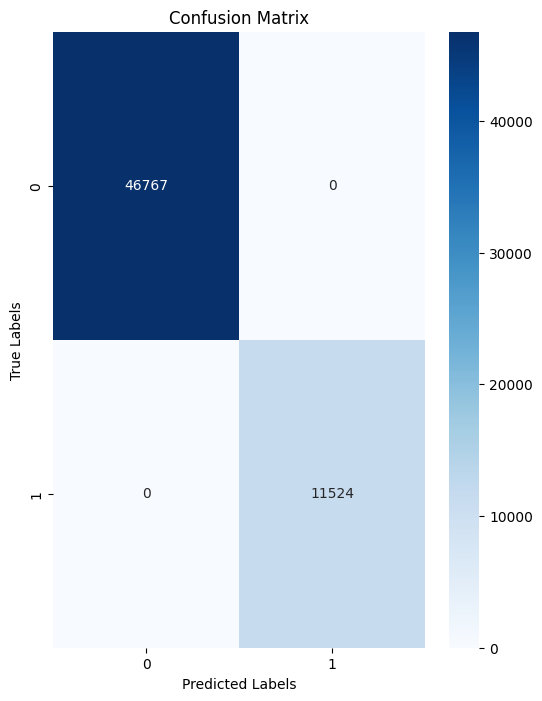

In [194]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

From the confusion matrix we saw that the model predicted the actual value of loan status to be true maximum times and here it completes our project.